<a href="https://colab.research.google.com/github/buriro-ezekia/Data-Preparation-to-Modelling/blob/main/Data_Preparation_to_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Load Excel Dataset

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Data Analysis with Python/DODOMA REGION INDUSTRIAL DATA SET.xlsx')
df.head(10)

,id,Zone_Name,Region_Name,District_Name,Ward_Name,Establishment_Name,Postal_Address,Street,Year_Started,ISICLev4,ISICLev4_Description,CPC_Code,CPC_Description,Tel_No,Mobile_No,Ownership_Description,Size_Class_Description,Employment,Subsector,Manufacturing_Classification
0,1,Central zone,Dodoma,Chemba,Churuku,ABAS KISEKU,180,MADUKANI,2013.0,1061,Manufacture of grain mill products,23140,Other cereal grain products (including corn fl...,NaN,NaN,Private,Micro,2,Manufacturing,Agro-Processing
1,2,Central zone,Dodoma,Chemba,Mrijo,ABAS SALUMU HUSEIN,830,POLISI,2014.0,2592,Treatment and coating of metals; machining,88731,Metal treatment and coating services,NaN,NaN,Private,Micro,2,Manufacturing,Metal and Metal Products
2,3,Central zone,Dodoma,Chemba,Mrijo,ABASI IDDI HUNGU,174,CHANG'OMBE B,2013.0,2821,Manufacture of agricultural and forestry machi...,44160,Self-loading or self-unloading trailers and se...,NaN,NaN,Private,Micro,2,Manufacturing,Assembly
3,4,Central zone,Dodoma,Chemba,Kimaha,ABBAS KHAMISI ATHUMAN,11,BWAWANI,2012.0,1410,"Manufacture of wearing apparel, except fur app...",28210,"Panty hose, tights, stockings, socks and other...",NaN,NaN,Private,Micro,2,Manufacturing,Textile and Apparel
4,5,Central zone,Dodoma,Dodoma Mjini,Kizota,ABC GARAGE,8635,RELINI,2002.0,2592,Treatment and coating of metals; machining,88731,Metal treatment and coating services,NaN,NaN,Private,Micro,2,Manufacturing,Metal and Metal Products
5,6,Central zone,Dodoma,Kongwa,Mtanana,ABDALA JUMA ABDALA,NaN,MISHENI,2001.0,1061,Manufacture of grain mill products,23140,Other cereal grain products (including corn fl...,754514631,NaN,Private,Micro,2,Manufacturing,Agro-Processing
6,7,Central zone,Dodoma,Bahi,Bahi,ABDALAH AHMED MABROK,NaN,BAHI MISSION,2013.0,2592,Treatment and coating of metals; machining,88731,Metal treatment and coating services,NaN,NaN,Private,Micro,2,Manufacturing,Metal and Metal Products
7,8,Central zone,Dodoma,Kongwa,Mkoka,ABDALAH MIRAJI,77,KAMBARAGE,2011.0,1040,Manufacture of vegetable and animal oils and fats,88140,Vegetable and animal oil and fat manufacturing...,782924416,NaN,Private,Micro,2,Manufacturing,Agro-Processing
8,9,Central zone,Dodoma,Kondoa,Busi,ABDALAH MOHAMED OIL PRESSING,NaN,MIDUWANI,2013.0,1040,Manufacture of vegetable and animal oils and fats,88140,Vegetable and animal oil and fat manufacturing...,NaN,NaN,Private,Micro,2,Manufacturing,Agro-Processing
9,10,Central zone,Dodoma,Kondoa,Masange,ABDALARAMADHANI NGOZI,6,MAJENGO,2009.0,1061,Manufacture of grain mill products,23140,Other cereal grain products (including corn fl...,787278343,NaN,Private,Micro,2,Manufacturing,Agro-Processing


In [78]:
# View Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            2896 non-null   int64  
 1   Zone_Name                     2896 non-null   object 
 2   Region_Name                   2896 non-null   object 
 3   District_Name                 2896 non-null   object 
 4   Ward_Name                     2870 non-null   object 
 5   Establishment_Name            2896 non-null   object 
 6   Postal_Address                1067 non-null   object 
 7   Street                        2006 non-null   object 
 8   Year_Started                  1963 non-null   float64
 9   ISICLev4                      2896 non-null   int64  
 10  ISICLev4_Description          2896 non-null   object 
 11  CPC_Code                      2896 non-null   int64  
 12  CPC_Description               2896 non-null   object 
 13  Tel

In [79]:

# Check for Missing Values
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
print("Missing Values (Count):")
print(missing_values)
print("\nMissing Values (Percentage):")
print(missing_values_percentage)



Missing Values (Count):
id                                 0
Zone_Name                          0
Region_Name                        0
District_Name                      0
Ward_Name                         26
Establishment_Name                 0
Postal_Address                  1829
Street                           890
Year_Started                     933
ISICLev4                           0
ISICLev4_Description               0
CPC_Code                           0
CPC_Description                    0
Tel_No                           880
Mobile_No                       2538
Ownership_Description              0
Size_Class_Description             0
Employment                         0
Subsector                          0
Manufacturing_Classification       0
dtype: int64

Missing Values (Percentage):
id                               0.000000
Zone_Name                        0.000000
Region_Name                      0.000000
District_Name                    0.000000
Ward_Name                

In [80]:
# Imputation strategies based on column data types and missing value percentages:

# 1. Categorical Columns with low missing values (<1%): Use mode imputation
for col in ['Ward_Name']:
  df[col] = df[col].fillna(df[col].mode()[0])

# 2. Categorical Columns with high missing values (>30%): Create a new category "Missing"
for col in ['Postal_Address', 'Street', 'Tel_No', 'Mobile_No']:
    df[col] = df[col].fillna('Missing')

# 3. Numerical Columns with high missing values (>30%): Use median imputation (less sensitive to outliers than mean)
for col in ['Year_Started']:
    df[col] = df[col].fillna(df[col].median())

# Verify the imputation
missing_values_after_imputation = df.isnull().sum()
print("\nMissing Values After Imputation (Count):")
print(missing_values_after_imputation)

missing_values_percentage_after_imputation = (missing_values_after_imputation / len(df)) * 100
print("\nMissing Values After Imputation (Percentage):")
missing_values_percentage_after_imputation



Missing Values After Imputation (Count):
id                              0
Zone_Name                       0
Region_Name                     0
District_Name                   0
Ward_Name                       0
Establishment_Name              0
Postal_Address                  0
Street                          0
Year_Started                    0
ISICLev4                        0
ISICLev4_Description            0
CPC_Code                        0
CPC_Description                 0
Tel_No                          0
Mobile_No                       0
Ownership_Description           0
Size_Class_Description          0
Employment                      0
Subsector                       0
Manufacturing_Classification    0
dtype: int64

Missing Values After Imputation (Percentage):


,0
id,0.0
Zone_Name,0.0
Region_Name,0.0
District_Name,0.0
Ward_Name,0.0
Establishment_Name,0.0
Postal_Address,0.0
Street,0.0
Year_Started,0.0
ISICLev4,0.0


In [81]:
# Check for Duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [id, Zone_Name, Region_Name, District_Name, Ward_Name, Establishment_Name, Postal_Address, Street, Year_Started, ISICLev4, ISICLev4_Description, CPC_Code, CPC_Description, Tel_No, Mobile_No, Ownership_Description, Size_Class_Description, Employment, Subsector, Manufacturing_Classification]
Index: []


In [82]:
# 3. Check Data Types
print("\nData Types:")
print(df.dtypes)


Data Types:
id                                int64
Zone_Name                        object
Region_Name                      object
District_Name                    object
Ward_Name                        object
Establishment_Name               object
Postal_Address                   object
Street                           object
Year_Started                    float64
ISICLev4                          int64
ISICLev4_Description             object
CPC_Code                          int64
CPC_Description                  object
Tel_No                           object
Mobile_No                        object
Ownership_Description            object
Size_Class_Description           object
Employment                        int64
Subsector                        object
Manufacturing_Classification     object
dtype: object


In [83]:
# 4. Check for Inconsistencies
# For example, Year_Started should not be in the future
current_year = 2025
inconsistent_years = df[df['Year_Started'] > current_year]
print("\nInconsistent Year_Started:")
print(inconsistent_years)


Inconsistent Year_Started:
Empty DataFrame
Columns: [id, Zone_Name, Region_Name, District_Name, Ward_Name, Establishment_Name, Postal_Address, Street, Year_Started, ISICLev4, ISICLev4_Description, CPC_Code, CPC_Description, Tel_No, Mobile_No, Ownership_Description, Size_Class_Description, Employment, Subsector, Manufacturing_Classification]
Index: []


In [84]:
# Check for negative values in Employment
negative_employment = df[df['Employment'] < 0]
print("\nNegative Employment Values:")
print(negative_employment)


Negative Employment Values:
Empty DataFrame
Columns: [id, Zone_Name, Region_Name, District_Name, Ward_Name, Establishment_Name, Postal_Address, Street, Year_Started, ISICLev4, ISICLev4_Description, CPC_Code, CPC_Description, Tel_No, Mobile_No, Ownership_Description, Size_Class_Description, Employment, Subsector, Manufacturing_Classification]
Index: []


In [114]:
# 5. Summary Statistics
print("\nSummary Statistics:")
print(df.describe().round(4))


Summary Statistics:
              id  Year_Started   ISICLev4    CPC_Code  Employment
count  2896.0000     2896.0000  2896.0000   2896.0000   2896.0000
mean   1448.5000     2009.0735  1639.6706  42189.1032      3.9178
std     836.1475        6.2820   778.4853  26161.0020      6.9357
min       1.0000     1905.0000   810.0000   3110.0000      2.0000
25%     724.7500     2009.0000  1061.0000  23140.0000      2.0000
50%    1448.5000     2011.0000  1399.0000  28210.0000      2.0000
75%    2172.2500     2012.0000  2511.0000  41111.0000      2.0000
max    2896.0000     2015.0000  3830.0000  94110.0000    100.0000


In [86]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL DATASET_FINAL_CLEANED.csv', index=False)


In [87]:
# Load the saved cleaned data
cleaned_df = pd.read_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL DATASET_FINAL_CLEANED.csv')
cleaned_df.head()

,id,Zone_Name,Region_Name,District_Name,Ward_Name,Establishment_Name,Postal_Address,Street,Year_Started,ISICLev4,ISICLev4_Description,CPC_Code,CPC_Description,Tel_No,Mobile_No,Ownership_Description,Size_Class_Description,Employment,Subsector,Manufacturing_Classification
0,1,Central zone,Dodoma,Chemba,Churuku,ABAS KISEKU,180,MADUKANI,2013.0,1061,Manufacture of grain mill products,23140,Other cereal grain products (including corn fl...,Missing,Missing,Private,Micro,2,Manufacturing,Agro-Processing
1,2,Central zone,Dodoma,Chemba,Mrijo,ABAS SALUMU HUSEIN,830,POLISI,2014.0,2592,Treatment and coating of metals; machining,88731,Metal treatment and coating services,Missing,Missing,Private,Micro,2,Manufacturing,Metal and Metal Products
2,3,Central zone,Dodoma,Chemba,Mrijo,ABASI IDDI HUNGU,174,CHANG'OMBE B,2013.0,2821,Manufacture of agricultural and forestry machi...,44160,Self-loading or self-unloading trailers and se...,Missing,Missing,Private,Micro,2,Manufacturing,Assembly
3,4,Central zone,Dodoma,Chemba,Kimaha,ABBAS KHAMISI ATHUMAN,11,BWAWANI,2012.0,1410,"Manufacture of wearing apparel, except fur app...",28210,"Panty hose, tights, stockings, socks and other...",Missing,Missing,Private,Micro,2,Manufacturing,Textile and Apparel
4,5,Central zone,Dodoma,Dodoma Mjini,Kizota,ABC GARAGE,8635,RELINI,2002.0,2592,Treatment and coating of metals; machining,88731,Metal treatment and coating services,Missing,Missing,Private,Micro,2,Manufacturing,Metal and Metal Products


In [88]:
# Check missing values
missing_values = cleaned_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                              0
Zone_Name                       0
Region_Name                     0
District_Name                   0
Ward_Name                       0
Establishment_Name              0
Postal_Address                  0
Street                          0
Year_Started                    0
ISICLev4                        0
ISICLev4_Description            0
CPC_Code                        0
CPC_Description                 0
Tel_No                          0
Mobile_No                       0
Ownership_Description           0
Size_Class_Description          0
Employment                      0
Subsector                       0
Manufacturing_Classification    0
dtype: int64


In [89]:
# 2. Check for Duplicates
duplicate_rows = cleaned_df[cleaned_df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [id, Zone_Name, Region_Name, District_Name, Ward_Name, Establishment_Name, Postal_Address, Street, Year_Started, ISICLev4, ISICLev4_Description, CPC_Code, CPC_Description, Tel_No, Mobile_No, Ownership_Description, Size_Class_Description, Employment, Subsector, Manufacturing_Classification]
Index: []


In [90]:
# View information in the cleaned data
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            2896 non-null   int64  
 1   Zone_Name                     2896 non-null   object 
 2   Region_Name                   2896 non-null   object 
 3   District_Name                 2896 non-null   object 
 4   Ward_Name                     2896 non-null   object 
 5   Establishment_Name            2896 non-null   object 
 6   Postal_Address                2896 non-null   object 
 7   Street                        2896 non-null   object 
 8   Year_Started                  2896 non-null   float64
 9   ISICLev4                      2896 non-null   int64  
 10  ISICLev4_Description          2896 non-null   object 
 11  CPC_Code                      2896 non-null   int64  
 12  CPC_Description               2896 non-null   object 
 13  Tel

# Data Visualisation

# Bar Plot for Categorical Variables

- **Zone_Name, Region_Name, District_Name, Ward_Name, ISICLev4_Description, CPC_Description, Ownership_Description, Size_Class_Description, Subsector, Manufacturing_Classification**

 - These columns contain categorical data, and bar plots can help visualize the distribution of categories. For example, you can see the number of establishments in each zone, region, district, etc.

In [91]:
# # Data Visualizations

# # Bar Plot for Zone_Name
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(12, 6))
# sns.countplot(data=cleaned_df, x='Zone_Name')
# plt.xticks(rotation=90)
# plt.title('Distribution of Establishments by Zone')
# plt.show()

# Histogram for Numerical Variables

- **Year_Started, Employment**
 - Histograms help in understanding the distribution of numerical data. For instance, you can see the distribution of the years when establishments were started or the employment numbers.

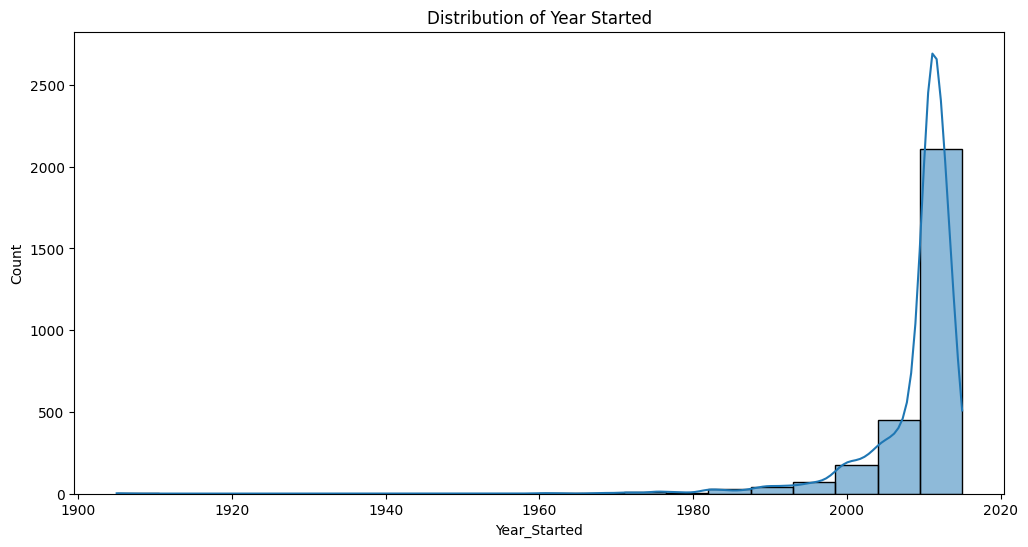

In [92]:
# Histogram for Year_Started
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['Year_Started'], bins=20, kde=True)
plt.title('Distribution of Year Started')
plt.show()

# Box Plot for Numerical Variables

- **Employment**
 - Box plots are useful for visualizing the spread and identifying outliers in numerical data.

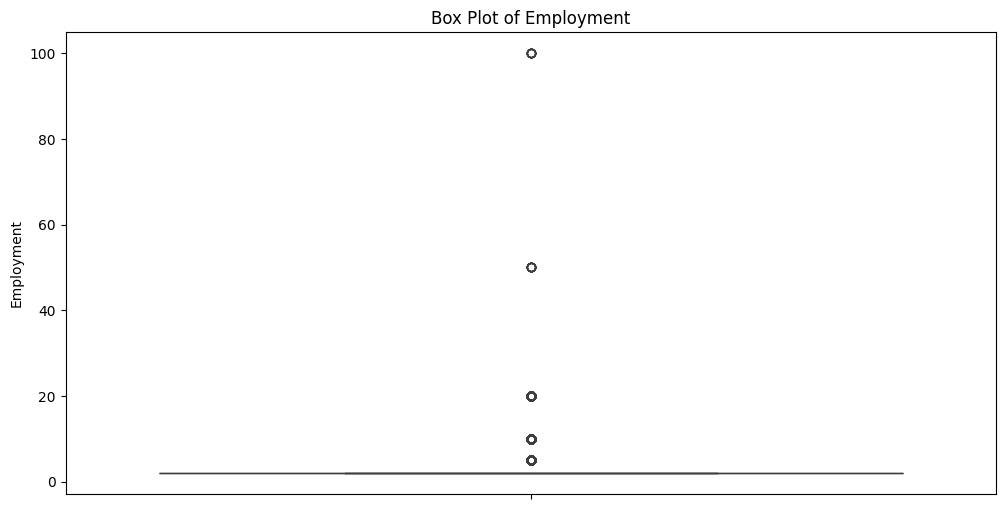

In [93]:
# Box Plot for Employment
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, y='Employment')
plt.title('Box Plot of Employment')
plt.show()


# Heatmap for Correlation Matrix

- **Numerical Variables (Year_Started, Employment, etc.)**
 - A heatmap can help visualize the correlation between numerical variables, which can be useful for identifying potential relationships.

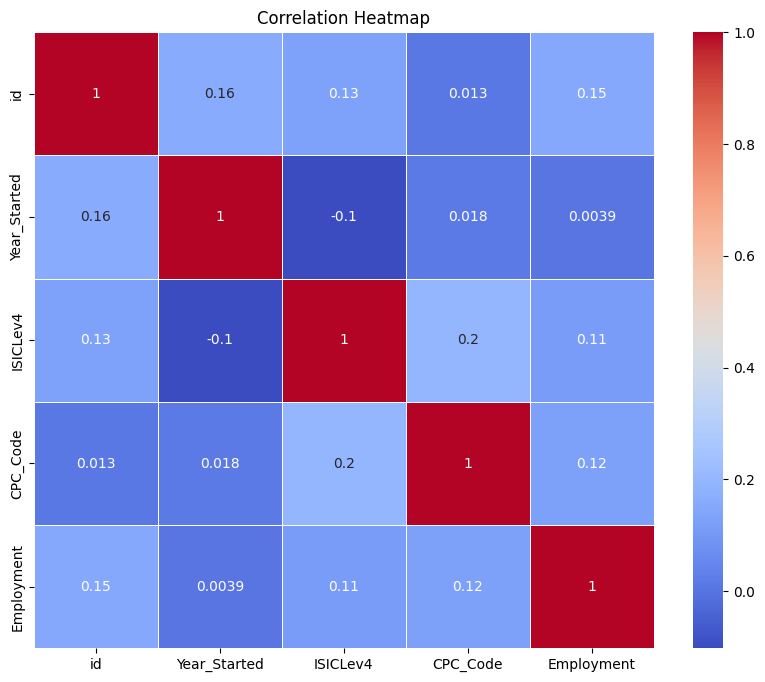

In [94]:
# Heatmap for Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_df = cleaned_df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pie Chart for Proportions of Categorical Variables

- **Zone_Name, Region_Name, etc.**
  - Pie charts can help visualize the proportion of different categories within a variable.

In [95]:
# # Pie Chart for Proportions of Region_Name
# plt.figure(figsize=(8, 8))
# cleaned_df['Region_Name'].value_counts().plot.pie(autopct='%1.1f%%')
# plt.title('Proportion of Establishments by Region')
# plt.ylabel('')
# plt.show()

# Feature Engineering

- Feature engineering is the process of transforming raw data into meaningful features that can be used to improve the performance of machine learning models.
- It involves creating new features, modifying existing ones, and selecting the most relevant features for the model.

In [96]:
# Feature Engineering

# 1. Extract Year, Month, and Day from Year_Started
cleaned_df['Year_Started'] = cleaned_df['Year_Started'].astype(int)
cleaned_df['Year'] = pd.to_datetime(cleaned_df['Year_Started'], format='%Y').dt.year

# 2. Create a new feature for the age of the establishment
current_year = 2025
cleaned_df['Establishment_Age'] = current_year - cleaned_df['Year_Started']

# 3. Combining Address Information
cleaned_df['Full_Address'] = cleaned_df['Postal_Address'].fillna('') + ', ' + cleaned_df['Street'].fillna('')

# 4. Categorize Employment size into bins
bins = [0, 10, 50, 100, 500, 1000, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1000+']
cleaned_df['Employment_Size_Category'] = pd.cut(cleaned_df['Employment'], bins=bins, labels=labels)

# 5. Encoding Categorical Variables
categorical_cols = ['Zone_Name', 'Region_Name', 'District_Name', 'Ward_Name', 'ISICLev4_Description', 'CPC_Description', 'Ownership_Description', 'Size_Class_Description', 'Subsector', 'Manufacturing_Classification']
cleaned_df = pd.get_dummies(cleaned_df, columns=categorical_cols, drop_first=True)

# Save the new dataset
cleaned_df.to_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_FEATURE_ENGINEERED.csv', index=False)

print("Feature engineering completed and new dataset saved.")

Feature engineering completed and new dataset saved.


In [97]:
# load the new dataset with feature engineered
cleaned_df = pd.read_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_FEATURE_ENGINEERED.csv')
cleaned_df.head(10)

,id,Establishment_Name,Postal_Address,Street,Year_Started,ISICLev4,CPC_Code,Tel_No,Mobile_No,Employment,...,Manufacturing_Classification_Leather and Leather Products,Manufacturing_Classification_Meat and Meat Products,Manufacturing_Classification_Metal and Metal Products,Manufacturing_Classification_Milk and Milk Products,Manufacturing_Classification_Minerals and Mineral Products,Manufacturing_Classification_Pharmaceutical and Medical Equipment Products,Manufacturing_Classification_Textile and Apparel,"Manufacturing_Classification_Water Supply,Sewerage and Waste Management","Manufacturing_Classification_Water supply, sewage, waste management and remediation activities",Manufacturing_Classification_Wood and Woods Products
0,1,ABAS KISEKU,180,MADUKANI,2013,1061,23140,Missing,Missing,2,...,False,False,False,False,False,False,False,False,False,False
1,2,ABAS SALUMU HUSEIN,830,POLISI,2014,2592,88731,Missing,Missing,2,...,False,False,True,False,False,False,False,False,False,False
2,3,ABASI IDDI HUNGU,174,CHANG'OMBE B,2013,2821,44160,Missing,Missing,2,...,False,False,False,False,False,False,False,False,False,False
3,4,ABBAS KHAMISI ATHUMAN,11,BWAWANI,2012,1410,28210,Missing,Missing,2,...,False,False,False,False,False,False,True,False,False,False
4,5,ABC GARAGE,8635,RELINI,2002,2592,88731,Missing,Missing,2,...,False,False,True,False,False,False,False,False,False,False
5,6,ABDALA JUMA ABDALA,Missing,MISHENI,2001,1061,23140,754514631,Missing,2,...,False,False,False,False,False,False,False,False,False,False
6,7,ABDALAH AHMED MABROK,Missing,BAHI MISSION,2013,2592,88731,Missing,Missing,2,...,False,False,True,False,False,False,False,False,False,False
7,8,ABDALAH MIRAJI,77,KAMBARAGE,2011,1040,88140,782924416,Missing,2,...,False,False,False,False,False,False,False,False,False,False
8,9,ABDALAH MOHAMED OIL PRESSING,Missing,MIDUWANI,2013,1040,88140,Missing,Missing,2,...,False,False,False,False,False,False,False,False,False,False
9,10,ABDALARAMADHANI NGOZI,6,MAJENGO,2009,1061,23140,787278343,Missing,2,...,False,False,False,False,False,False,False,False,False,False


In [98]:
# View information in the dataset

print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Columns: 387 entries, id to Manufacturing_Classification_Wood and Woods Products
dtypes: bool(373), int64(7), object(7)
memory usage: 1.3+ MB
None


In [99]:
# View column names

cleaned_df.columns

Index(['id', 'Establishment_Name', 'Postal_Address', 'Street', 'Year_Started',
       'ISICLev4', 'CPC_Code', 'Tel_No', 'Mobile_No', 'Employment',
       ...
       'Manufacturing_Classification_Leather and Leather Products',
       'Manufacturing_Classification_Meat and Meat Products',
       'Manufacturing_Classification_Metal and Metal Products',
       'Manufacturing_Classification_Milk and Milk Products',
       'Manufacturing_Classification_Minerals and Mineral Products',
       'Manufacturing_Classification_Pharmaceutical and Medical Equipment Products',
       'Manufacturing_Classification_Textile and Apparel',
       'Manufacturing_Classification_Water Supply,Sewerage and Waste Management',
       'Manufacturing_Classification_Water supply, sewage, waste management and remediation activities',
       'Manufacturing_Classification_Wood and Woods Products'],
      dtype='object', length=387)

# Feature Selection

- Feature selection is a crucial step in the data preprocessing stage, as it helps in improving the performance of the model and reduces overfitting by selecting the most relevant features.

# Chi-Squared Test

-  This is suitable for categorical features. Since your dataset has many one-hot encoded categorical variables, the Chi-squared test can help in selecting features that have a significant relationship with the target variable.

In [100]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.preprocessing import LabelEncoder

# # Load the feature-engineered dataset
# df = pd.read_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_FEATURE_ENGINEERED.csv')

# # Display the first few rows of the DataFrame
# print("Dataset Preview:")
# print(df.head())

# Specify 'Employment' as the target column
target_column = 'Employment'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert object type columns to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)  # Ensure values are treated as strings
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Determine the number of features available
num_features = X.shape[1]
k = min(20, num_features)  # Ensure k does not exceed available features

# Choose appropriate feature selection method
if y.dtype.kind in 'ifu':  # If target variable is continuous
    print("Using f_regression for feature selection (continuous target).")
    selector = SelectKBest(f_regression, k=k)
else:  # If target variable is categorical
    print("Using Chi-Squared for feature selection (categorical target).")
    selector = SelectKBest(chi2, k=k)

# Apply feature selection
X_kbest = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

# Fix: Use `.copy()` to avoid SettingWithCopyWarning
selected_features_df = df[selected_features].copy()

# Add the target column back
selected_features_df[target_column] = y

# Save the dataset with selected features
output_path = 'drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES_CHI2.csv'
selected_features_df.to_csv(output_path, index=False)

print(f"\nFeature selection completed. Dataset saved at: {output_path}")


Using f_regression for feature selection (continuous target).

Selected Features:
Index(['id', 'Zone_Name', 'Region_Name', 'District_Name', 'Ward_Name',
       'Establishment_Name', 'Postal_Address', 'Street', 'Year_Started',
       'ISICLev4', 'ISICLev4_Description', 'CPC_Code', 'CPC_Description',
       'Tel_No', 'Mobile_No', 'Ownership_Description',
       'Size_Class_Description', 'Subsector', 'Manufacturing_Classification'],
      dtype='object')

Feature selection completed. Dataset saved at: drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES_CHI2.csv


# Feature Importance from Tree-Based Models (e.g., Random Forest, XGBoost)

- Tree-based models can naturally handle mixed types of features and provide feature importance scores. These importance scores can be used to select the most relevant features.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# # Load the feature-engineered dataset
# df = pd.read_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_FEATURE_ENGINEERED.csv')

# # Display the first few rows of the DataFrame
# print(df.head())

# Specify 'Employment' as the target column
target_column = 'Employment'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert object type columns to numerical using Label Encoding
# Convert all values to strings before applying Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)  # Convert to string type
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features = X.columns[indices][:20]

print("Selected features using Random Forest:")
print(selected_features)

Selected features using Random Forest:
Index(['Size_Class_Description', 'id', 'Street', 'Establishment_Name',
       'Tel_No', 'Ward_Name', 'Mobile_No', 'ISICLev4', 'ISICLev4_Description',
       'CPC_Description', 'CPC_Code', 'Year_Started', 'Postal_Address',
       'District_Name', 'Manufacturing_Classification',
       'Ownership_Description', 'Subsector', 'Region_Name', 'Zone_Name'],
      dtype='object')


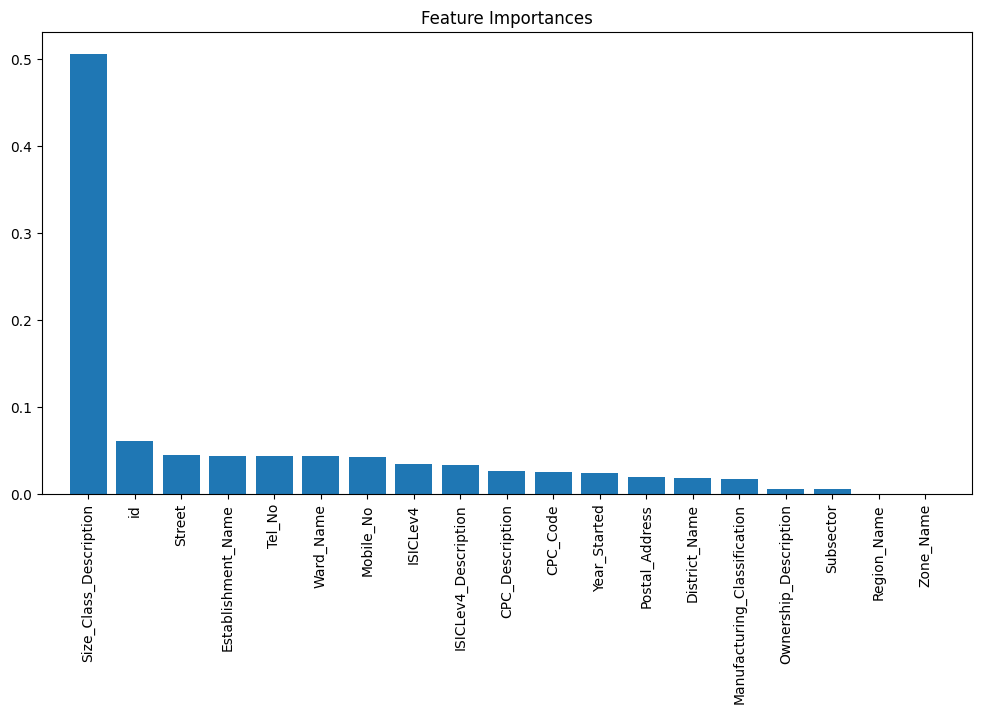

In [102]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
num_features_to_plot = min(len(importances), 20)  # Determine the number of features to plot
plt.bar(range(num_features_to_plot), importances[indices][:num_features_to_plot], align='center')
plt.xticks(range(num_features_to_plot), X.columns[indices][:num_features_to_plot], rotation=90)
plt.xlim([-1, num_features_to_plot])  # Adjust x-axis limits
plt.show()

In [103]:
# Save the dataset with selected features
selected_features_df = df[selected_features]
selected_features_df[target_column] = y
selected_features_df.to_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES.csv', index=False)

print("Feature selection completed and new dataset saved.")

Feature selection completed and new dataset saved.


# Model Training

In [76]:
# Model Building

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Load the dataset with selected features
df = pd.read_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES.csv')

# Define the selected features
selected_features = ['Size_Class_Description', 'id', 'Street', 'Establishment_Name',
                     'Tel_No', 'Ward_Name', 'Mobile_No', 'ISICLev4', 'ISICLev4_Description',
                     'CPC_Description', 'CPC_Code', 'Year_Started', 'Postal_Address',
                     'District_Name', 'Manufacturing_Classification', 'Ownership_Description',
                     'Subsector', 'Region_Name', 'Zone_Name']

# Specify 'Employment' as the target column
target_column = 'Employment'

# Separate features and target
X = df[selected_features]
y = df[target_column]

# Identify categorical features for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output=False, handle_unknown='ignore'
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(X[categorical_features]))

# Get feature names after encoding and replace invalid characters
encoded_categorical_data.columns = encoder.get_feature_names_out(categorical_features)
encoded_categorical_data.columns = encoded_categorical_data.columns.str.replace('[\[\]\<]', '_', regex=True)  # Replace [, ], < with _

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_categorical_data], axis=1)

# Use a subset of the data for quick testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reduce the number of rows for quick execution (optional)
X_train, X_test, y_train, y_test = X_train[:1000], X_test[:500], y_train[:1000], y_test[:500]

# Initialize the models with fewer estimators
models = {
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=10, random_state=42),
    'Linear Regression': LinearRegression()
}

In [104]:
# Train and evaluate the models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)  # Parallelize cross-validation
    results[name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2,
        'Cross-Validation Score': np.mean(cv_scores)
    }
    print(f"{name} completed.")


Training Random Forest...
Random Forest completed.
Training XGBoost...
XGBoost completed.
Training Linear Regression...
Linear Regression completed.


In [106]:
# Print the results with values rounded to 4 decimal places
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {round(value, 4)}")
    print("\n")  # Keeps spacing between models


Model: Random Forest
Mean Squared Error: 3.7931
R^2 Score: 0.8886
Cross-Validation Score: 0.85


Model: XGBoost
Mean Squared Error: 3.6494
R^2 Score: 0.8928
Cross-Validation Score: 0.8673


Model: Linear Regression
Mean Squared Error: 30.2465
R^2 Score: 0.1115
Cross-Validation Score: -0.087




### Summary of Model Performances

#### **Random Forest**
-  The Random Forest model performs well, with a low Mean Squared Error (MSE) of 3.7931 and a high R² score of 0.8886, indicating it explains approximately 88.86% of the variance in the target variable. The cross-validation score of 0.85 suggests good generalisation to unseen data.


#### **XGBoost**
-  The XGBoost model slightly outperforms Random Forest, with a lower MSE of 3.6494 and a higher R² score of 0.8928, explaining around 89.28% of the variance in the target variable. Its cross-validation score of 0.8673 indicates strong generalisation performance.


#### **Linear Regression**
-  The Linear Regression model performs poorly compared to Random Forest and XGBoost, with a high MSE of 30.2465 and a low R² score of 0.1115, explaining just 11.15% of the variance in the target variable. The negative cross-validation score of -0.087 indicates poor generalisation to unseen data.
- **Limitations:** Linear Regression assumes a linear relationship between features and the target variable. Given the likely non-linear relationships in the data, this model struggles to capture the underlying patterns effectively.

**Conclusion**

Based on the evaluation metrics, **XGBoost** emerges as the best-performing model with the lowest MSE and the highest R^2 score and cross-validation score. It is followed closely by Random Forest, which also performs well but slightly below XGBoost. Linear Regression performs poorly in comparison due to the likely non-linear relationships in the data that it cannot capture effectively.

For practical usage, I recommend using XGBoost for predicting the "Employment" variable, as it provides the best overall performance. Additionally, feature importance scores from XGBoost can be used to interpret the model and understand the key drivers of employment in the dataset.

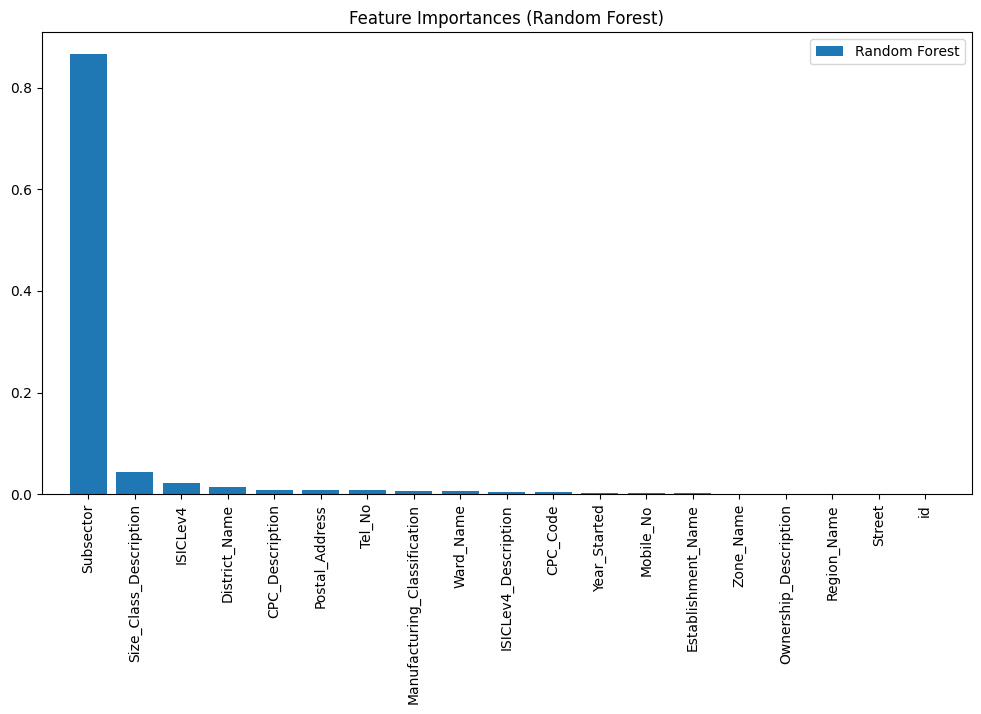

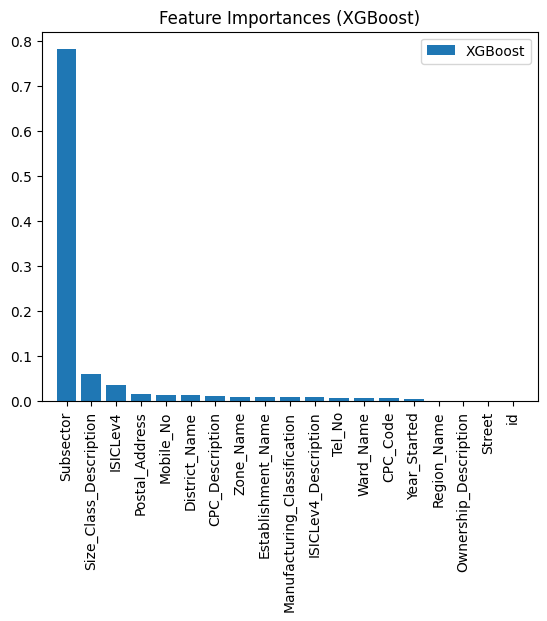

In [107]:
# Plot feature importances for Random Forest and XGBoost
plt.figure(figsize=(12, 6))
for model_name in ['Random Forest', 'XGBoost']:
    importances = models[model_name].feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.bar(range(len(selected_features)), importances[indices], align='center', label=model_name)
    plt.xticks(range(len(selected_features)), np.array(selected_features)[indices], rotation=90)
    plt.xlim([-1, len(selected_features)])
    plt.title(f'Feature Importances ({model_name})')
    plt.legend()
    plt.show()

In [109]:
# Save the dataset with selected features
selected_features_df = df[selected_features]
selected_features_df[target_column] = y
selected_features_df.to_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES_FINAL.csv', index=False)

print("Model building and evaluation completed. Dataset with selected features saved.")
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {round(value, 4)}")
    print("\n")  # Keeps spacing between models



Model building and evaluation completed. Dataset with selected features saved.
Model: Random Forest
Mean Squared Error: 3.7931
R^2 Score: 0.8886
Cross-Validation Score: 0.85


Model: XGBoost
Mean Squared Error: 3.6494
R^2 Score: 0.8928
Cross-Validation Score: 0.8673


Model: Linear Regression
Mean Squared Error: 30.2465
R^2 Score: 0.1115
Cross-Validation Score: -0.087




# Best Model Implementation

In [111]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# # Load the dataset with selected features
# df = pd.read_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES.csv')

# # Define the selected features
# selected_features = ['Size_Class_Description', 'id', 'Street', 'Establishment_Name',
#                      'Tel_No', 'Ward_Name', 'Mobile_No', 'ISICLev4', 'ISICLev4_Description',
#                      'CPC_Description', 'CPC_Code', 'Year_Started', 'Postal_Address',
#                      'District_Name', 'Manufacturing_Classification', 'Ownership_Description',
#                      'Subsector', 'Region_Name', 'Zone_Name']

# # Specify 'Employment' as the target column
# target_column = 'Employment'

# # Separate features and target
# X = df[selected_features]
# y = df[target_column]

# # Identify categorical features for one-hot encoding
# categorical_features = X.select_dtypes(include=['object']).columns

# # Apply one-hot encoding to categorical features
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output=False, handle_unknown='ignore'
# encoded_categorical_data = pd.DataFrame(encoder.fit_transform(X[categorical_features]))

# # Get feature names after encoding and replace invalid characters
# encoded_categorical_data.columns = encoder.get_feature_names_out(categorical_features)
# encoded_categorical_data.columns = encoded_categorical_data.columns.str.replace('[\[\]\<]', '_', regex=True)  # Replace [, ], < with _

# # Drop original categorical columns and concatenate encoded columns
# X = X.drop(categorical_features, axis=1)
# X = pd.concat([X, encoded_categorical_data], axis=1)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor(n_estimators=10, random_state=42)

# Train the model
print("Training XGBoost...")
model.fit(X_train, y_train)
print("XGBoost training completed.")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)  # Parallelize cross-validation

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Cross-Validation Score: {np.mean(cv_scores):.4f}")

Training XGBoost...
XGBoost training completed.
Mean Squared Error: 3.6494
R^2 Score: 0.8928
Cross-Validation Score: 0.8673


The XGBoost model has demonstrated strong performance in predicting the "Employment" variable with the following metrics;

- **Mean Squared Error (MSE): 3.6494**
- **R² Score: 0.8928**
- **Cross-Validation Score: 0.8673**

These metrics indicate that the model is highly effective in explaining the variance in the target variable "Employment," with an R² score of $0.8928$ suggesting that approximately $89.28\%$ of the variance is accounted for by the model. The low MSE indicates that the model's predictions are close to the actual values, and the high cross-validation score suggests that the model generalizes well to unseen data.

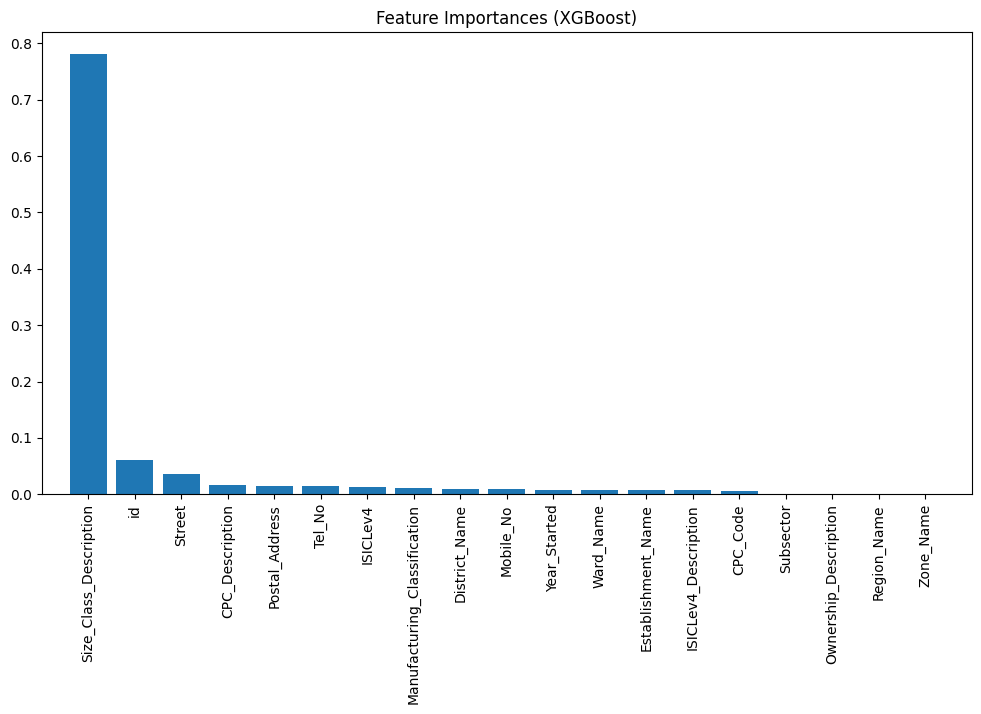

Model building and evaluation completed. Dataset with selected features saved.


In [112]:
# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.title('Feature Importances (XGBoost)')
plt.show()

# Save the dataset with selected features
selected_features_df = df[selected_features]
selected_features_df[target_column] = y
selected_features_df.to_csv('drive/MyDrive/Data Analysis with Python/DODOMA_REGION_INDUSTRIAL_DATASET_SELECTED_FEATURES_FINAL.csv', index=False)

print("Model building and evaluation completed. Dataset with selected features saved.")